In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("electric.csv", index_col = 0)
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [4]:
df.index

Index(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01', '1985-05-01',
       '1985-06-01', '1985-07-01', '1985-08-01', '1985-09-01', '1985-10-01',
       ...
       '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01'],
      dtype='object', name='DATE', length=421)

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='DATE', length=421, freq=None)

In [8]:
df.columns = ['Energy Production']

In [9]:
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


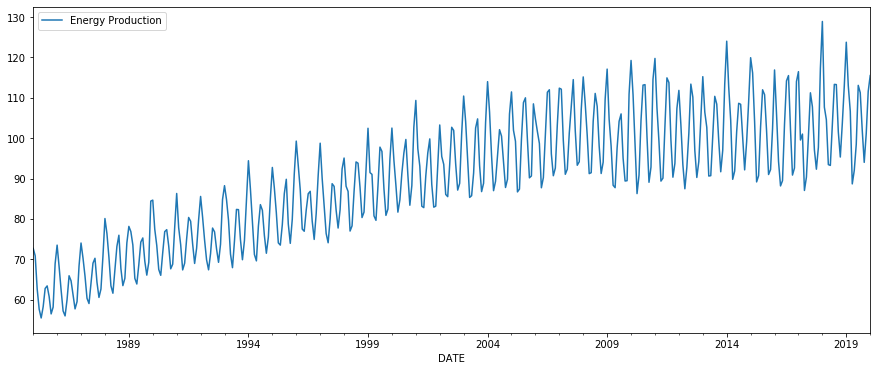

In [11]:
df.plot(figsize = (15, 6))

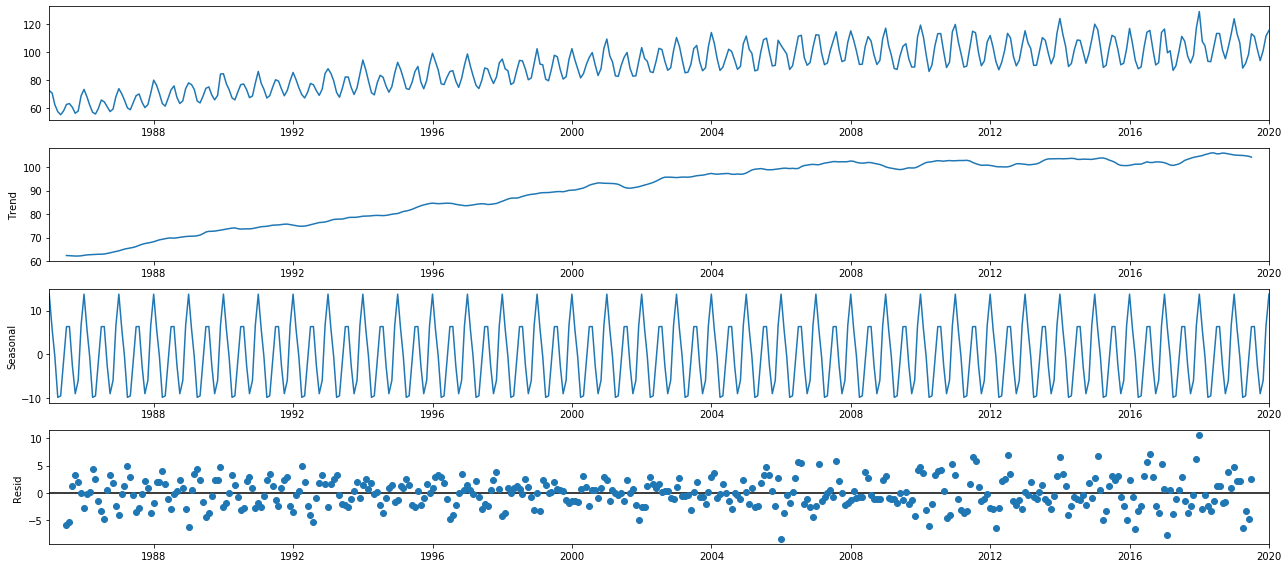

In [16]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df,  model = 'additive')
fig = decomposition.plot()

## Simple Moving Average

In [19]:
df_ma = df.copy()
df_ma['SMA_6'] = df_ma['Energy Production'].rolling(window = 6).mean()
df_ma['SMA_12'] = df_ma['Energy Production'].rolling(window = 12).mean()
df_ma.head(15)

,Energy Production,SMA_6,SMA_12
DATE,,,
1985-01-01,72.6803,NaN,NaN
1985-02-01,70.8479,NaN,NaN
1985-03-01,62.6166,NaN,NaN
1985-04-01,57.6106,NaN,NaN
1985-05-01,55.4467,NaN,NaN
1985-06-01,58.2228,62.904150,NaN
1985-07-01,62.7591,61.250617,NaN
1985-08-01,63.3921,60.007983,NaN
1985-09-01,60.7507,59.697000,NaN


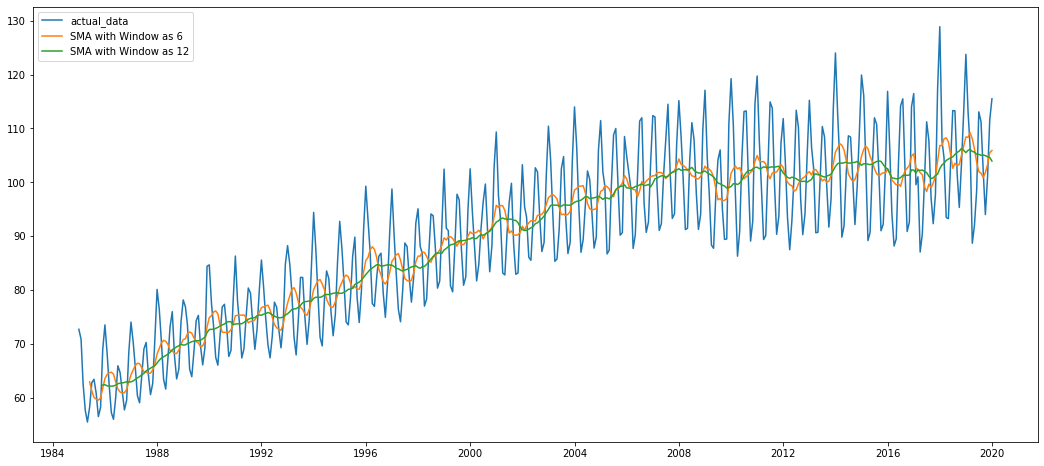

In [20]:
plt.plot(df_ma['Energy Production'], label = 'actual_data')
plt.plot(df_ma['SMA_6'], label = 'SMA with Window as 6')
plt.plot(df_ma['SMA_12'], label = 'SMA with Window as 12')
plt.legend()

In [21]:
# MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/ y_true))*100

In [23]:
print("MAPE with SMA_6: ",mape(df_ma['Energy Production'], df_ma['SMA_6']))
print("MAPE with SMA_12: ",mape(df_ma['Energy Production'], df_ma['SMA_12']))

MAPE with SMA_6:  7.221884666087801
MAPE with SMA_12:  7.32645161473586


In [24]:
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


## Let's check if the time series is stationary or not using ADF Test

In [25]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df)

print("P-Value : %0.4f" % adf_test[1])


P-Value : 0.0873


Since the p-value>0.05, we conclude that the time series is not stationary

## Differencing

In [26]:
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [30]:
df.diff()

,Energy Production
DATE,
1985-01-01,NaN
1985-02-01,-1.8324
1985-03-01,-8.2313
1985-04-01,-5.0060
1985-05-01,-2.1639
...,...
2019-09-01,-9.2658
2019-10-01,-8.0039
2019-11-01,7.0766


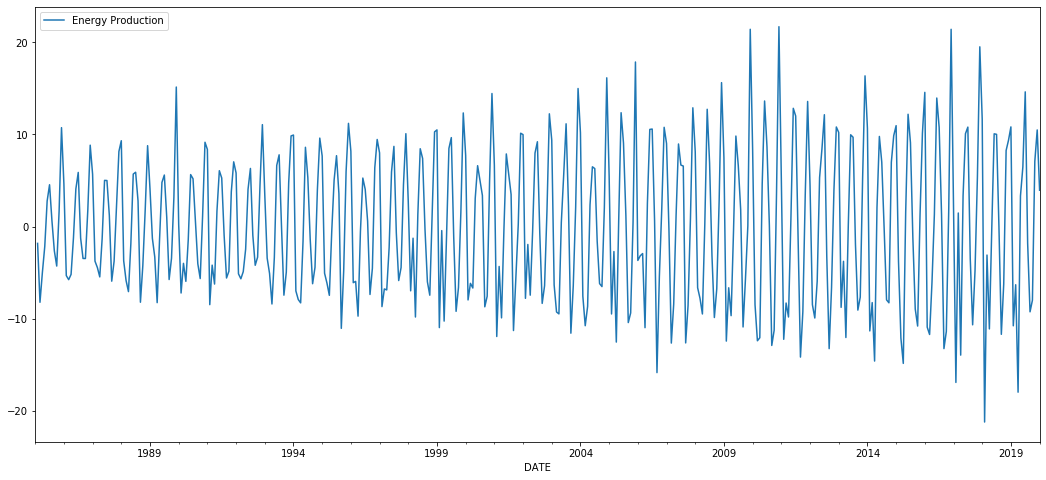

In [31]:
df.diff().plot()

In [33]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df.diff().dropna())

print("P-Value : %0.4f" % adf_test[1])


P-Value : 0.0000


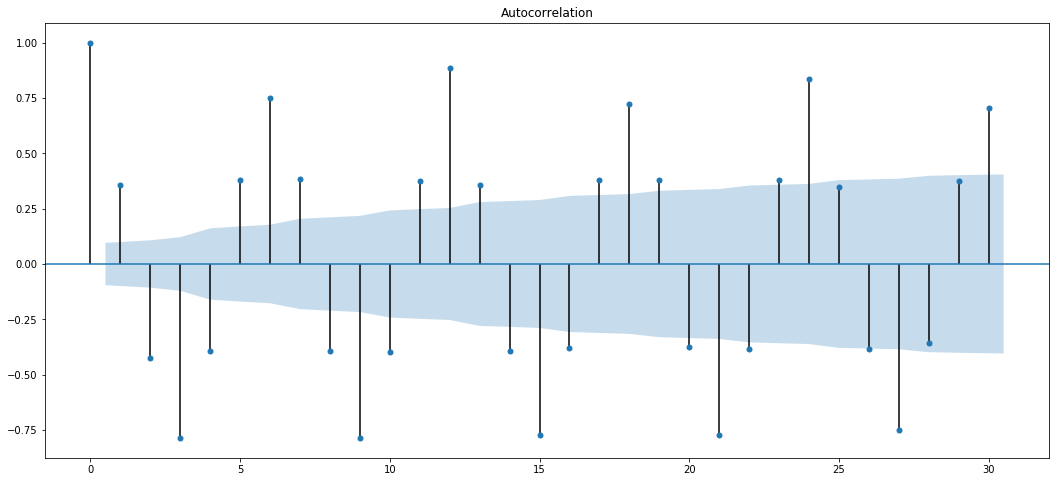

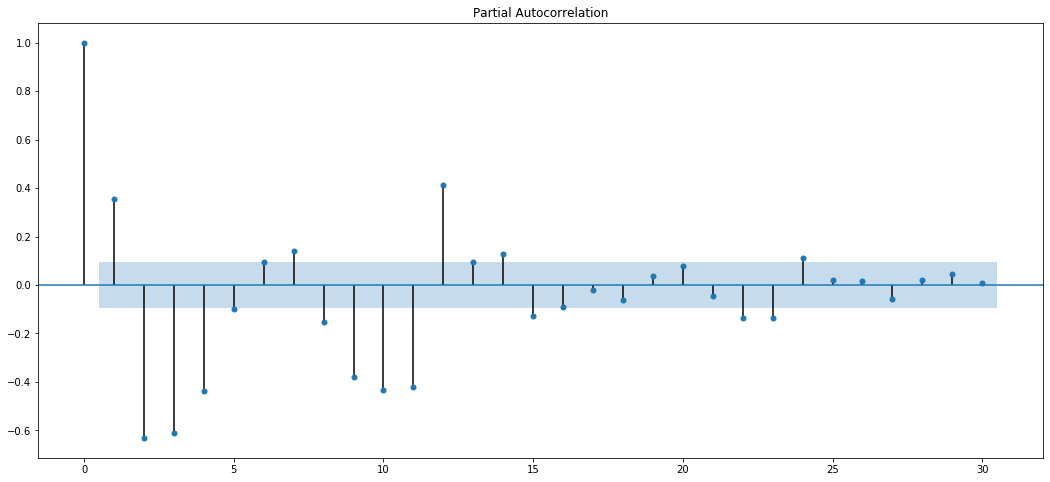

In [34]:
import statsmodels.graphics.tsaplots as tsa

tsa.plot_acf(df.diff().dropna(), lags = 30)
tsa.plot_pacf(df.diff().dropna(), lags = 30)
plt.show()

p = 24
d = 1
q = 0

In [36]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df, order = (12, 1, 0) )
result_arima = model.fit()

In [39]:
predictions = result_arima.predict(typ = 'levels')
predictions

1985-02-01     72.780228
1985-03-01     70.291771
1985-04-01     59.350957
1985-05-01     60.209735
1985-06-01     62.844213
                 ...    
2019-09-01    101.263113
2019-10-01     96.234525
2019-11-01    101.279231
2019-12-01    111.511264
2020-01-01    121.551209
Freq: MS, Length: 420, dtype: float64

In [40]:
df_arima = df.copy()
df_arima['ARIMA'] = predictions

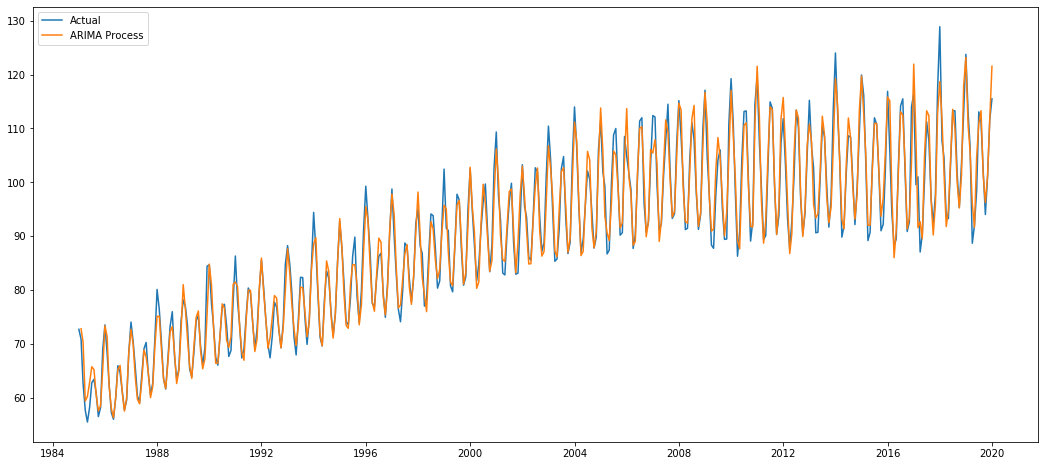

In [42]:
plt.plot(df_arima['Energy Production'], label = 'Actual')
plt.plot(df_arima['ARIMA'], label = 'ARIMA Process')
plt.legend()

In [43]:
mape(df_arima['Energy Production'], df_arima['ARIMA'])

2.2232145741766716